# **Radial Velocity Method**

https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS

**Single Planet**

51 Peg 
11 UMi \\
70 Vir \\
81 Cet \\
kCrB \\
14 And \\
16 Cyg B (2) \\
11 Com \\
HD 108147 \\
HD 130322 \\
HD 49674 \\
18 Del \\
______________
7 CMa \\
GJ 1184 \\
42 Dra* \\
55 Cnc b* \\
Proxima Centauri b*
_____________________

**Multiple Planets**

61 Vir \\
CoRoT-7 \\
GJ 581 \\
GJ 876 \\
__________________
24 Sex* \\
HD 7924* \\
HD 69830* \\

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from astropy.io import fits
from astropy.convolution import convolve, Box1DKernel
import matplotlib.pyplot as plt
import numpy as np
from astropy.timeseries import LombScargle, BoxLeastSquares
from scipy.optimize import curve_fit
#plt.style.use('dark_background')

## **Single Planet**

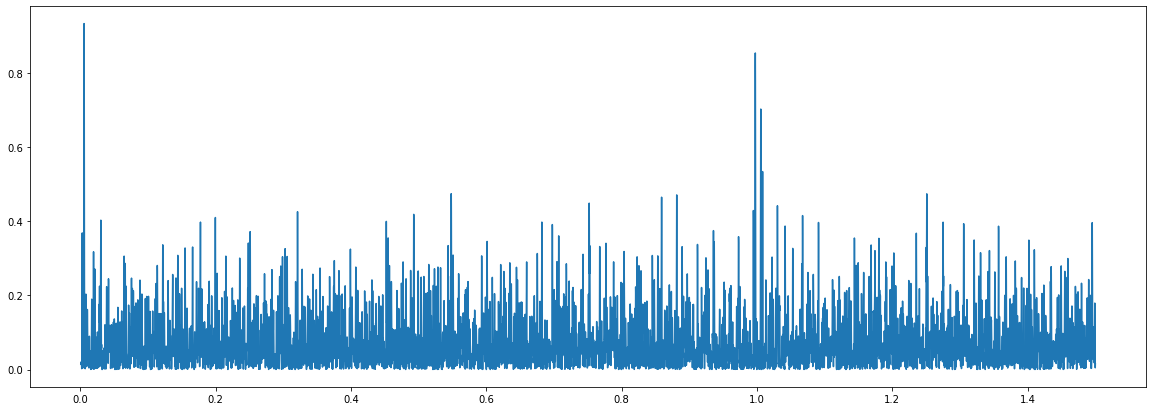

array([187.07633571])

In [67]:
f1 = open('gdrive/My Drive/Exoplanet/14And.txt')
t=[]
y=[]
dy=[]


for i in f1.readlines():
  l = i.split()
  t.append(float(l[0]))
  y.append(float(l[1]))
  dy.append(float(l[2]))

plt.figure(figsize=(20,7))
frequency, power = LombScargle(t, y,dy).autopower(minimum_frequency=0.0005,
                                                   maximum_frequency=1.5
                                                  )
plt.plot(frequency,power)
#plt.xlim(0,0.01)
plt.show()

np.reciprocal(frequency[np.where(power == np.max(power))])

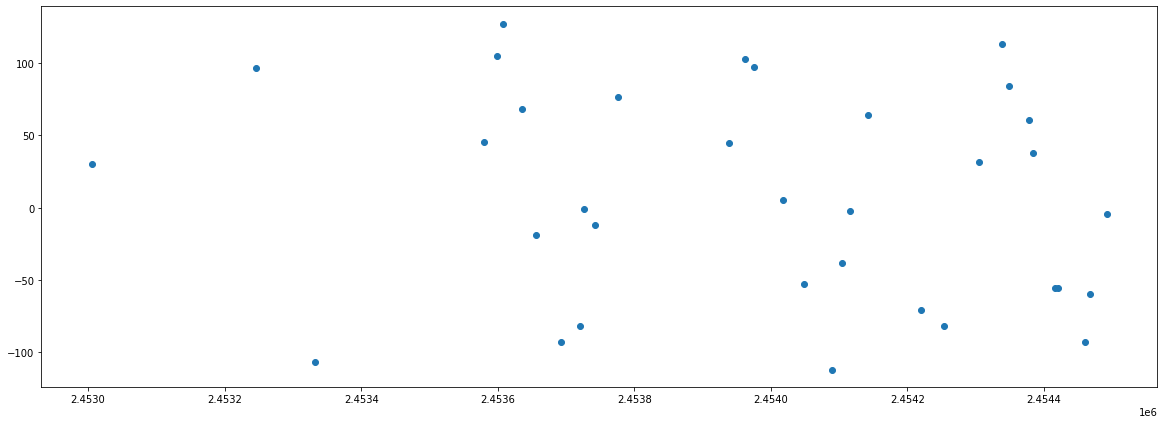

In [68]:
plt.figure(figsize=(20,7))
plt.scatter(t,y)
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[186.08946286]


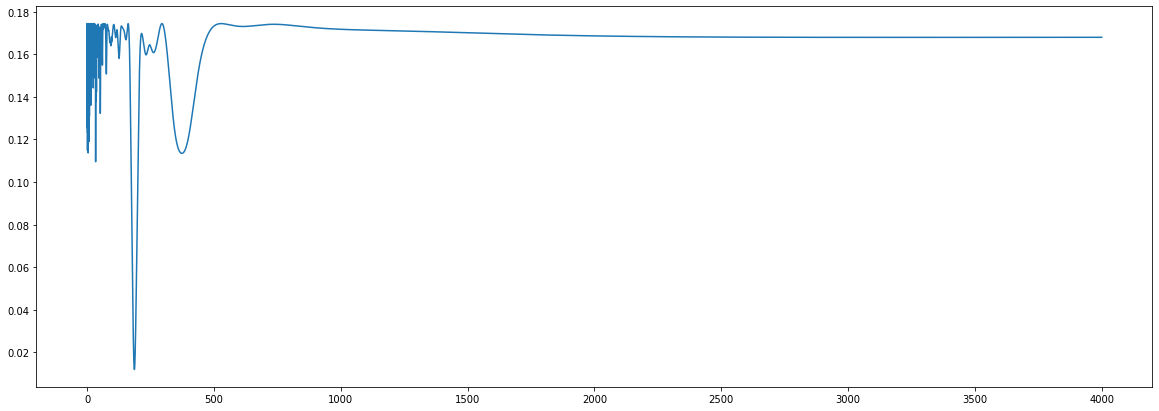

In [60]:
def per(x, A, phi):
  return c + A*np.sin(2*np.pi*freq*x + phi)# + A2*np.cos(2*np.pi*freq*x)

days = np.concatenate((np.linspace(0.01,100,10000),np.flip(np.reciprocal(np.linspace(0.00025,0.0100,9976)))))
freqs = np.reciprocal(days)

c = np.mean(y)
mmse = []
for j in freqs:
  freq = j
  params, covs = curve_fit(per, t, y)#, bounds = ([-1000,-1000,0.001],[1000,1000,1.1]))
  sumsquares = 0
  fits = [per(i, params[0], params[1]) for i in t]
  for n in range(len(t)):
    sumsquares += (fits[n] - y[n])**2
  mmse.append(sumsquares)

print(days[np.where(mmse == np.min(mmse))])
plt.figure(figsize=(20,7))
plt.plot(days,np.array(mmse)/1000000)
plt.show()

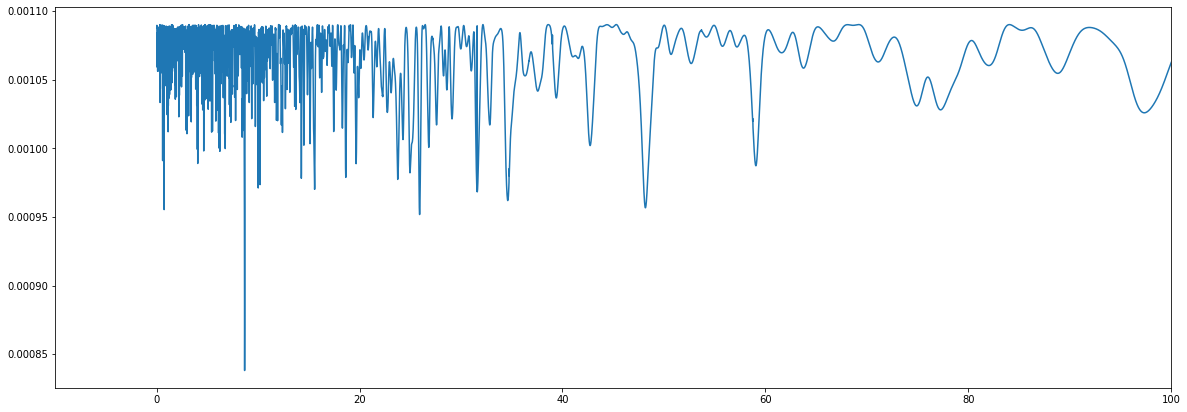

array([8.67])

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(days,np.array(mmse)/1000000)
plt.xlim(-10,100)
plt.show()
days[np.where(mmse == np.min(mmse))]

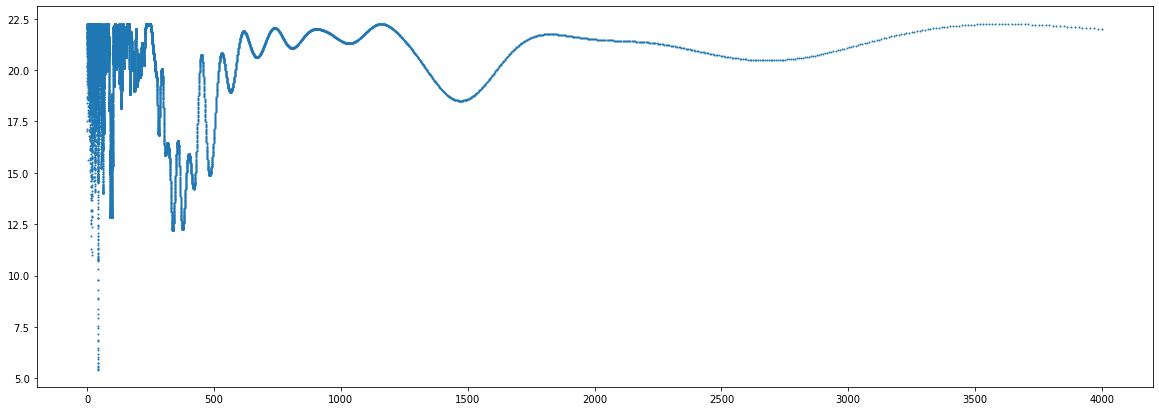

array([41.38])

In [ ]:
plt.figure(figsize=(20,7))
plt.scatter(days,np.array(mmse)/1000,s=1)
plt.show()
days[np.where(mmse == np.min(mmse))]

In [32]:
ystd = np.std(y)
y = np.array(y)
t = np.array(t)
y = y[np.where(np.abs(y - c) < 3*ystd)]
t = t[np.where(np.abs(y - c) < 3*ystd)]

def gaussian(t, y, freq):
  std = 1
  A = (np.max(y) - np.min(y))/2.5
  s = 0
  e_prev = 0
  ideal = c + A*np.cos(2*np.pi*freq*np.array(t))
  for i in range(len(t)):
    s += (y[i] - ideal[i] - e_prev)**2
    e_prev = y[i] - ideal[i]
  return s

[184.4123071]


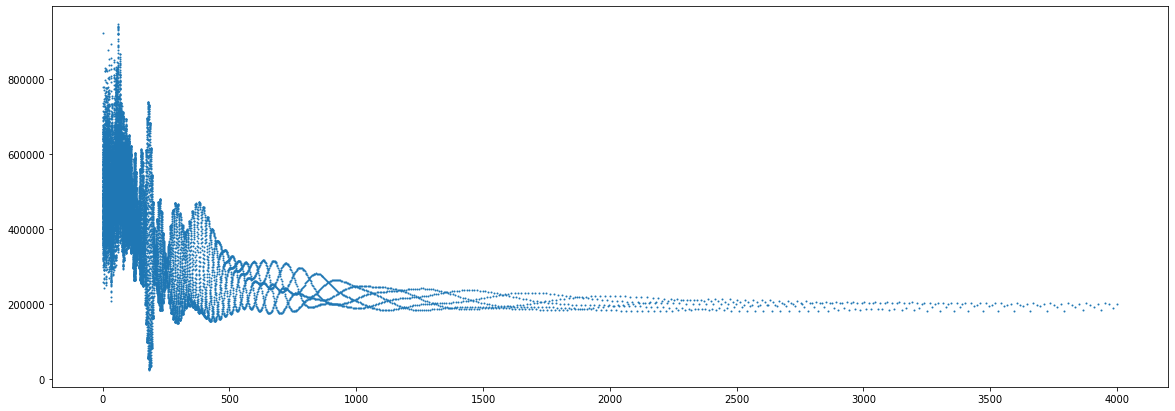

In [62]:
amps = [gaussian(t, y, j) for j in freqs]
print(days[np.where(amps == np.min(amps))])
plt.figure(figsize=(20,7))
plt.scatter(days,amps,s=1)
#plt.xlim(0,0.01)
plt.show()

In [52]:
def fourier(t, y, f):
  s = 0
  for i in range(len(t)):
    s += (y[i]-c)*np.sin(2*np.pi*f*t[i])
  return s

In [63]:
amps = [fourier(t, y, j) for j in freqs]

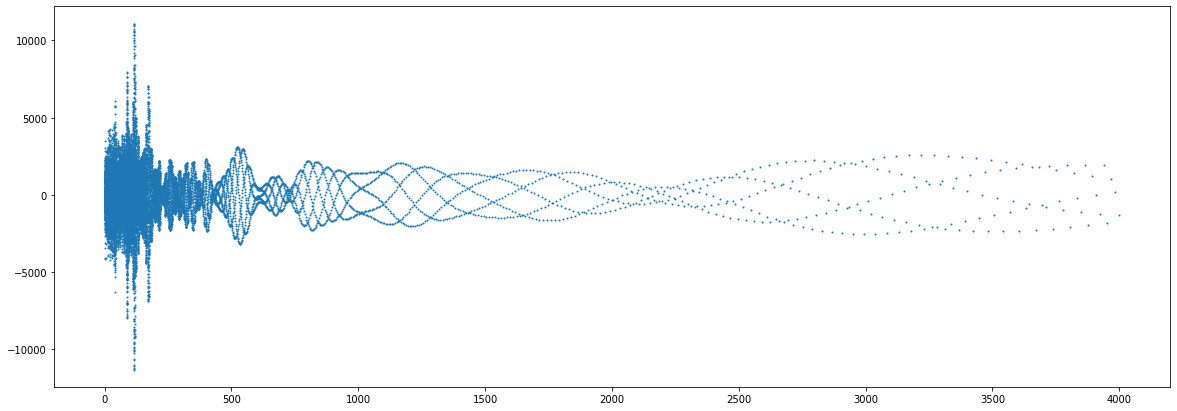

In [54]:
plt.figure(figsize=(20,7))
plt.scatter(days,amps,s=1)
plt.show()

In [64]:
fmax = freqs[np.where(amps == np.min(amps))]
days[np.where(np.abs(amps) == np.max(np.abs(amps)))]

array([185.48218395])

## **Multiple Planets**

In [ ]:
told = t
yold = y

In [ ]:
t = told
y = yold

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<Figure size 1440x504 with 0 Axes>

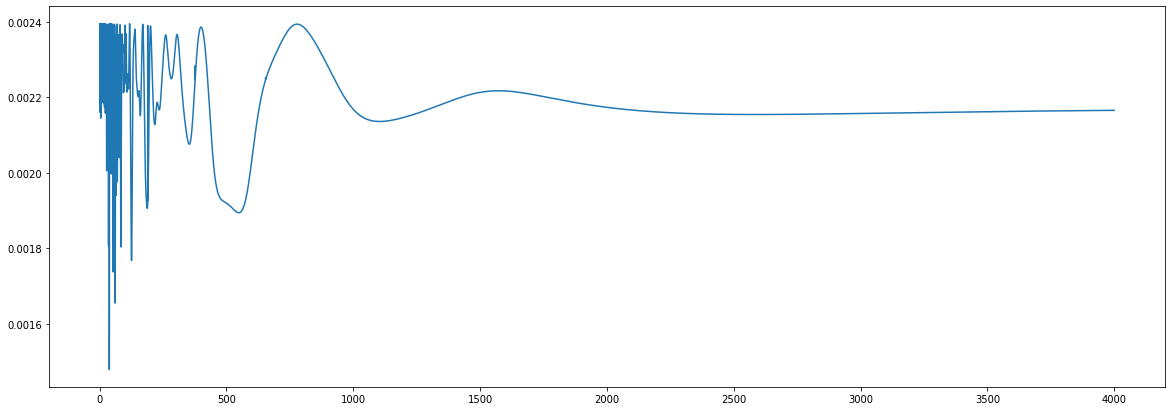

37.96


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<Figure size 1440x504 with 0 Axes>

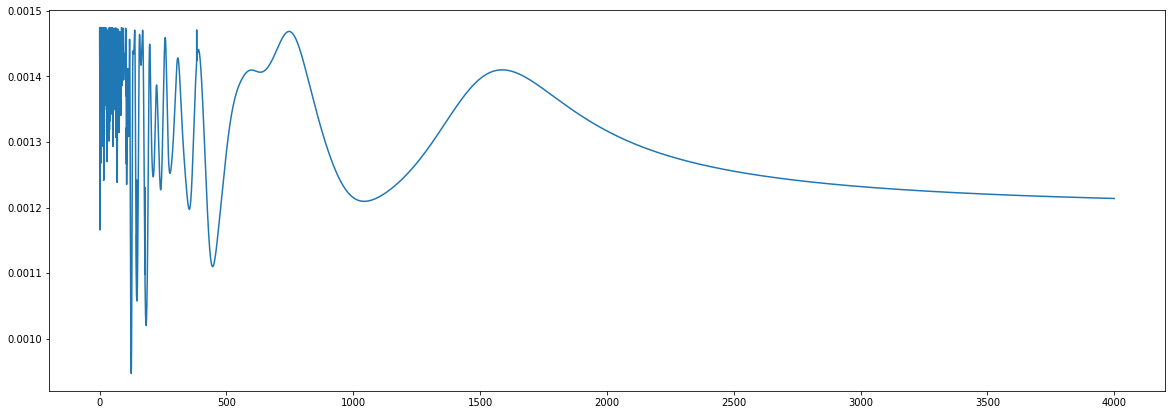

124.38974205495596


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<Figure size 1440x504 with 0 Axes>

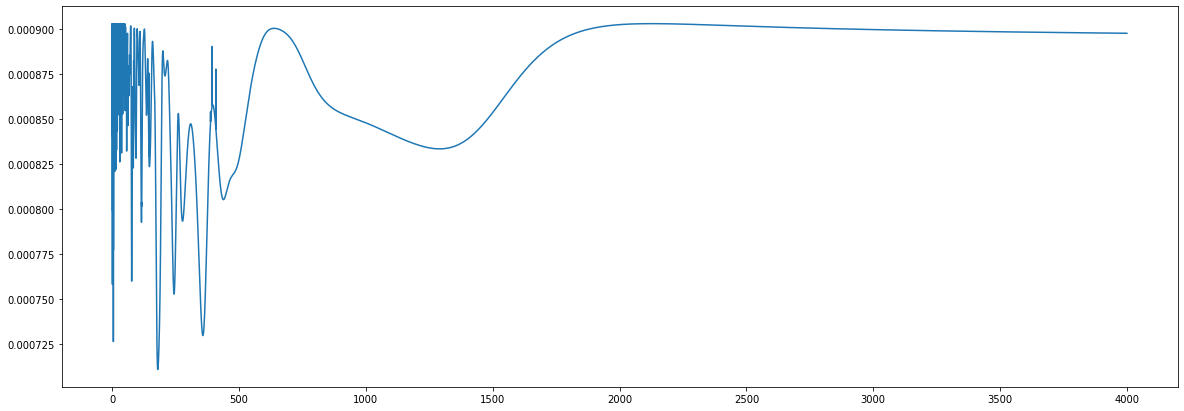

179.33712683045223


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<Figure size 1440x504 with 0 Axes>

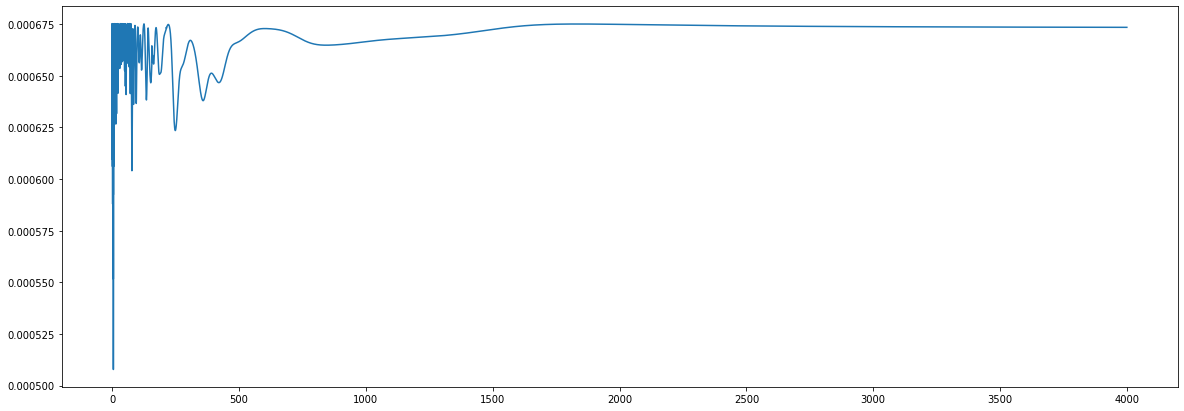

4.24


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

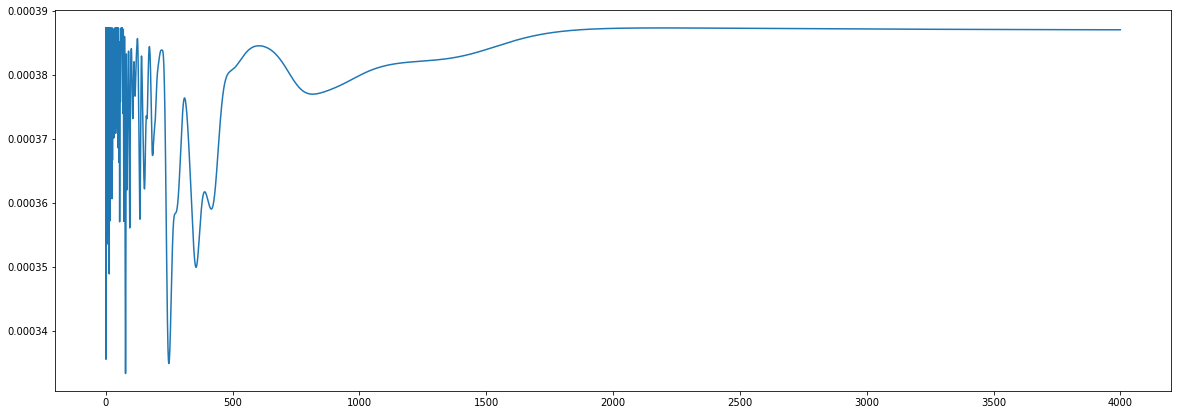

77.84


In [66]:
iter = 0
maxes = []


while (iter < 5):

  plt.figure(figsize=(20,7))
  c = np.mean(y)
  mmse = []
  for j in freqs:
    freq = j
    params, covs = curve_fit(per, t, y)#, bounds = ([-1000,-1000,0.001],[1000,1000,1.1]))
    sumsquares = 0
    fits = [per(i, params[0], params[1]) for i in t]
    for n in range(len(t)):
      sumsquares += (fits[n] - y[n])**2
    mmse.append(sumsquares)

  #days[np.where(mmse == np.min(mmse))]
  
  fmax = freqs[np.where(mmse == np.min(mmse))][0]
  already = False
  for i in maxes:
    if np.abs(1/fmax - i) <= 2:
      already = True
      break

  if not already:
    plt.figure(figsize=(20,7))
    plt.plot(days,np.array(mmse)/1000000)
    plt.show()
    print(1/fmax)
    iter += 1
    maxes.append(1/fmax)

  freq = fmax
  params, covs = curve_fit(per, t, y)
  y = np.array(y) - np.array([per(i, params[0], params[1]) for i in t])

  
  #np.reciprocal(frequency[np.where(power >= 0.6)])

In [ ]:
maxes

[60.96, 30.210000000000004, 60.33999999999999, 15.06]

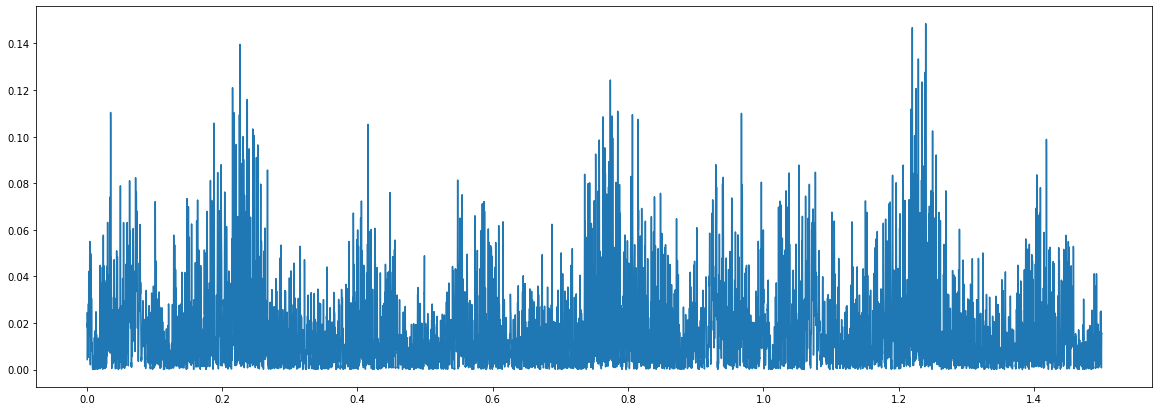

0.8065182741337503


/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [25]:
while (len(frequency[np.where(power >= 0.4)]) > 0):

  plt.figure(figsize=(20,7))
  frequency, power = LombScargle(t, y,dy).autopower(minimum_frequency=0.0005,
                                                    maximum_frequency=1.5
                                                    )
  plt.plot(frequency,power)
  plt.show()
  fmax = frequency[np.where(power == np.max(power))][0]
  print(1/fmax)

  freq = fmax
  params, covs = curve_fit(per, t, y)
  y = np.array(y) - np.array([per(i, params[0], params[1]) for i in t])